In [1]:
data(state)
statedata = data.frame(state.x77)

In [2]:
str(statedata)

'data.frame':	50 obs. of  8 variables:
 $ Population: num  3615 365 2212 2110 21198 ...
 $ Income    : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy: num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp  : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder    : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad   : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost     : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area      : num  50708 566432 113417 51945 156361 ...


In [3]:
RegModel = lm(Life.Exp ~ ., data=statedata)

In [5]:
summary(RegModel)


Call:
lm(formula = Life.Exp ~ ., data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10


In [6]:
Predictions = predict(RegModel)

In [7]:
sum((statedata$Life.Exp - Predictions)^2)

[1] 23.29714

In [8]:
RegModel2 = lm(Life.Exp ~ Population + Murder + Frost + HS.Grad, data=statedata)

In [9]:
summary(RegModel2)


Call:
lm(formula = Life.Exp ~ Population + Murder + Frost + HS.Grad, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


In [10]:
Predictions2 = predict(RegModel2)
sum((statedata$Life.Exp - Predictions2)^2)

[1] 23.30804

In [11]:
cor(statedata$Life.Exp, statedata$Income)

cor(statedata$Life.Exp, statedata$Illiteracy)

cor(statedata$Life.Exp, statedata$Area)

[1] 0.3402553

[1] -0.5884779

[1] -0.1073319

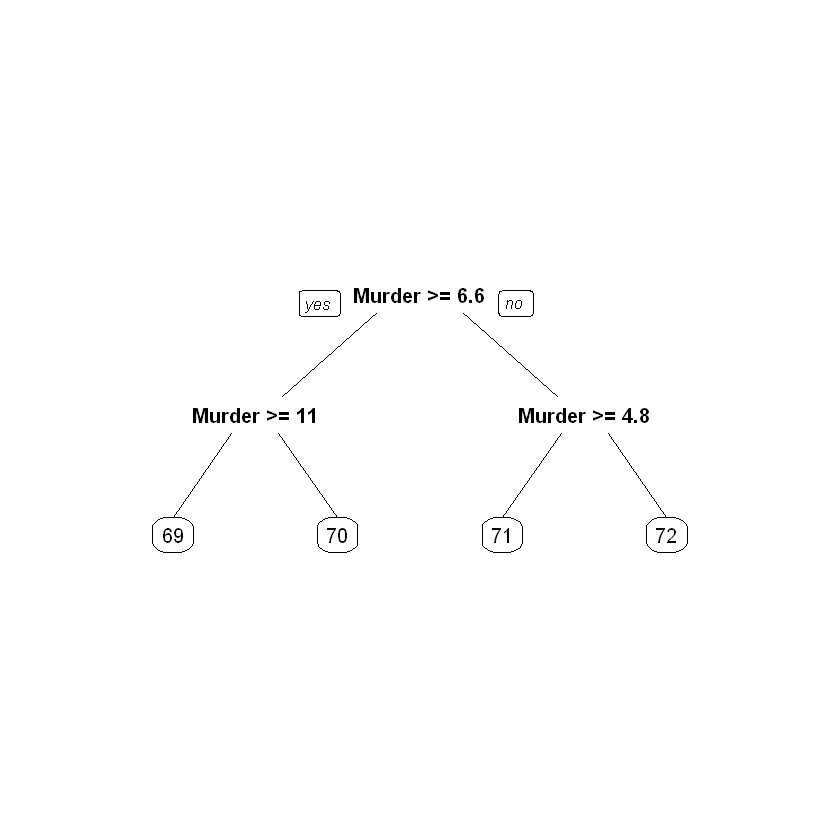

In [14]:
library(rpart)
library(rpart.plot)
CARTmodel = rpart(Life.Exp ~ ., data=statedata)
prp(CARTmodel)

In [15]:
PredictionsCART = predict(CARTmodel)

sum((statedata$Life.Exp - PredictionsCART)^2)

[1] 28.99848

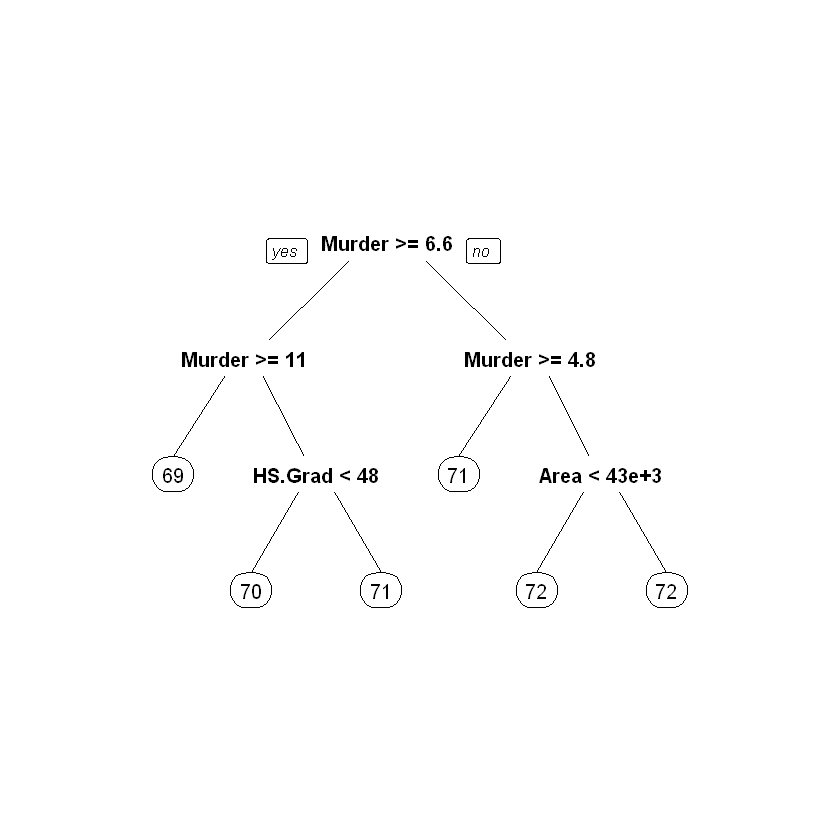

In [16]:
CARTmodel2 = rpart(Life.Exp ~ ., data=statedata, minbucket=5)
prp(CARTmodel2)

In [17]:
PredictionsCART2 = predict(CARTmodel2)
sum((statedata$Life.Exp - PredictionsCART2)^2)

[1] 23.64283

In [18]:
CARTmodel3 = rpart(Life.Exp ~ Area, data=statedata, minbucket=1)

PredictionsCART3 = predict(CARTmodel3)

sum((statedata$Life.Exp - PredictionsCART3)^2)

[1] 9.312442

In [19]:
library(caret)

set.seed(111)

Loading required package: lattice

Loading required package: ggplot2



In [20]:
fitControl = trainControl(method = "cv", number = 10)

cartGrid = expand.grid(.cp = seq(0.01, 0.5, 0.01) )

In [21]:
train(Life.Exp ~ ., data=statedata, method="rpart", trControl = fitControl, tuneGrid = cartGrid)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

50 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 44, 45, 45, 46, 44, 45, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE      
  0.01  1.042909  0.5206939  0.8299237
  0.02  1.042909  0.5206939  0.8299237
  0.03  1.027748  0.5338091  0.8173654
  0.04  1.032567  0.5338091  0.8173654
  0.05  1.032567  0.5338091  0.8173654
  0.06  1.033866  0.5206565  0.8320776
  0.07  1.029830  0.5285854  0.8252412
  0.08  1.029830  0.5285854  0.8252412
  0.09  1.029830  0.5285854  0.8252412
  0.10  1.005814  0.5512315  0.8079269
  0.11  1.005814  0.5512315  0.8079269
  0.12  1.005814  0.5512315  0.8079269
  0.13  1.032234  0.5238042  0.8262453
  0.14  1.083214  0.5041955  0.8725504
  0.15  1.106834  0.4822947  0.9050228
  0.16  1.138118  0.4775423  0.9422217
  0.17  1.174001  0.4287787  0.9676503
  0.18  1.192122  0.3990629  0.9942598
  0.19  1.192122  0.3990629  0.9942598
  0.20  1.192122  0.3990629  0.

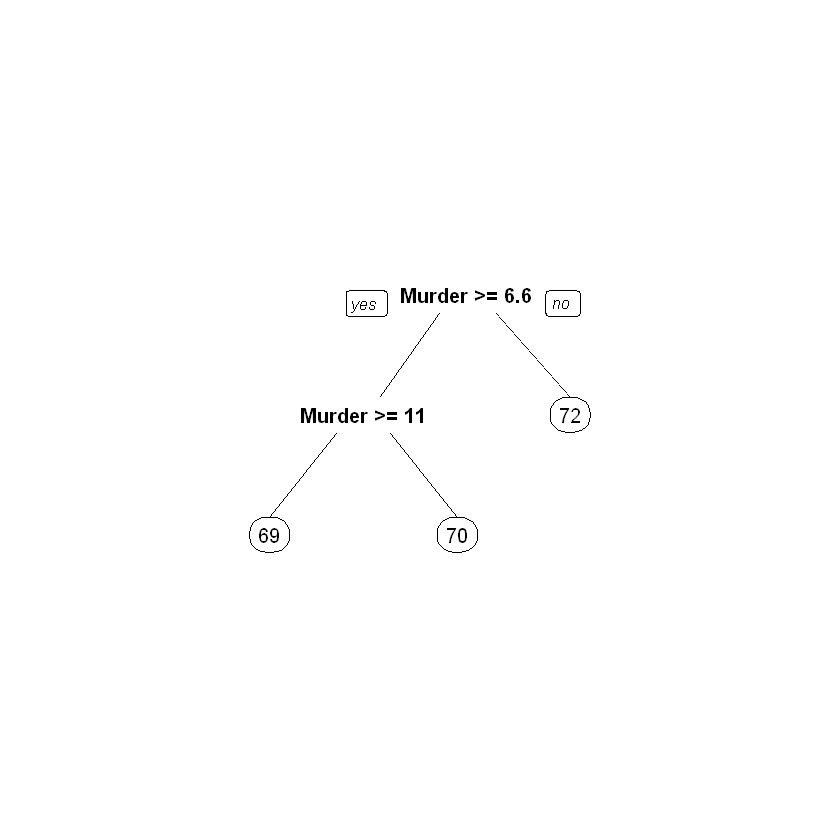

In [22]:
CARTmodel4 = rpart(Life.Exp ~ ., data=statedata, cp=0.12)
prp(CARTmodel4)

In [23]:
PredictionsCART4 = predict(CARTmodel4)
sum((statedata$Life.Exp - PredictionsCART4)^2)

[1] 32.86549

In [24]:
set.seed(111)

train(Life.Exp ~ Area, data=statedata, method="rpart", trControl = fitControl, tuneGrid = cartGrid )

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

50 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 44, 45, 45, 46, 44, 45, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared     MAE     
  0.01  1.285085  0.242889993  1.068979
  0.02  1.297420  0.227958081  1.077964
  0.03  1.297420  0.227958081  1.077964
  0.04  1.297420  0.227958081  1.077964
  0.05  1.297420  0.227958081  1.077964
  0.06  1.283241  0.255224868  1.071996
  0.07  1.283241  0.255224868  1.071996
  0.08  1.277535  0.253025061  1.054684
  0.09  1.286127  0.239816630  1.060619
  0.10  1.286127  0.239816630  1.060619
  0.11  1.286127  0.239816630  1.060619
  0.12  1.278550  0.239816630  1.060619
  0.13  1.336117  0.205007172  1.116064
  0.14  1.364618  0.132092640  1.125916
  0.15  1.364016  0.272311296  1.124202
  0.16  1.348422  0.216040174  1.128918
  0.17  1.365452  0.125811897  1.110581
  0.18  1.334937  0.006222148  1.103295
  0.19  1.328891          NaN  1.099663
  0.20  1.3

In [25]:
CARTmodel5 = rpart(Life.Exp ~ Area, data=statedata, cp=0.02)

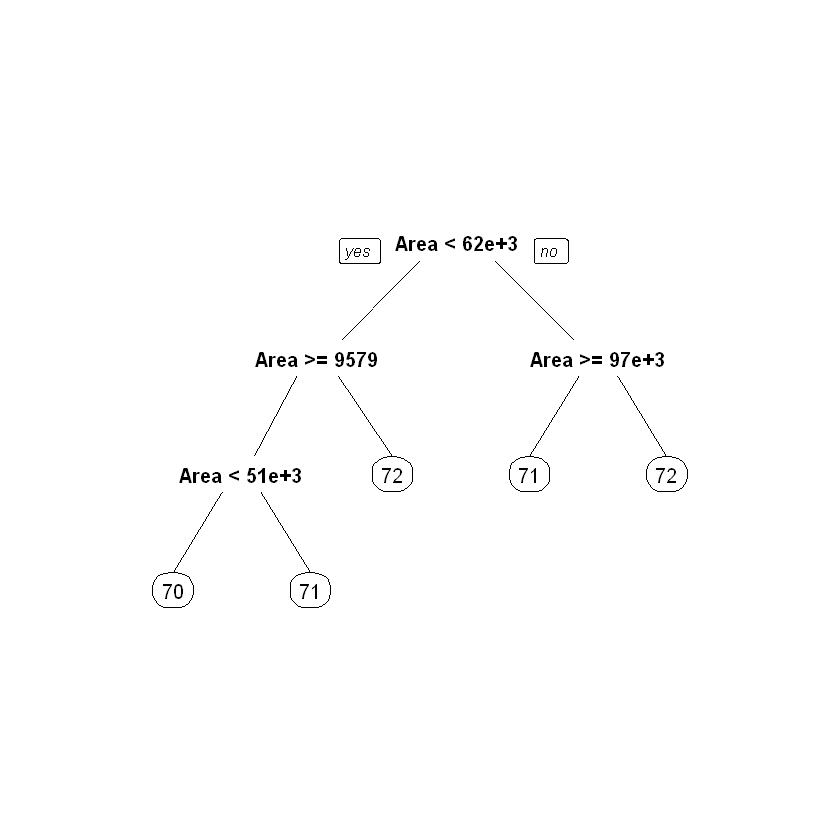

In [26]:
prp(CARTmodel5)

In [27]:
PredictionsCART5 = predict(CARTmodel5)

sum((statedata$Life.Exp - PredictionsCART5)^2)

[1] 44.26817